In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [81]:
train = pd.read_csv('Breast+cancer+data.csv')
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [82]:
train.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
train.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797

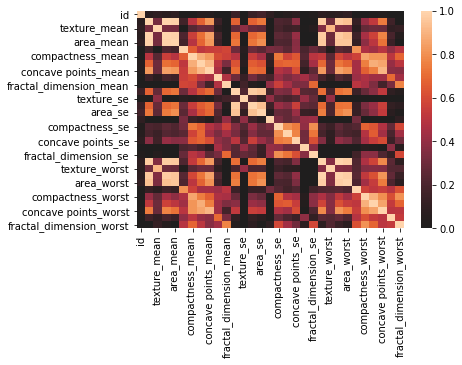

In [7]:
sns.heatmap(train.corr(), vmin=0, vmax = 1, center = 0)

In [75]:
train.shape

(569, 32)

In [10]:
train.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [66]:
train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

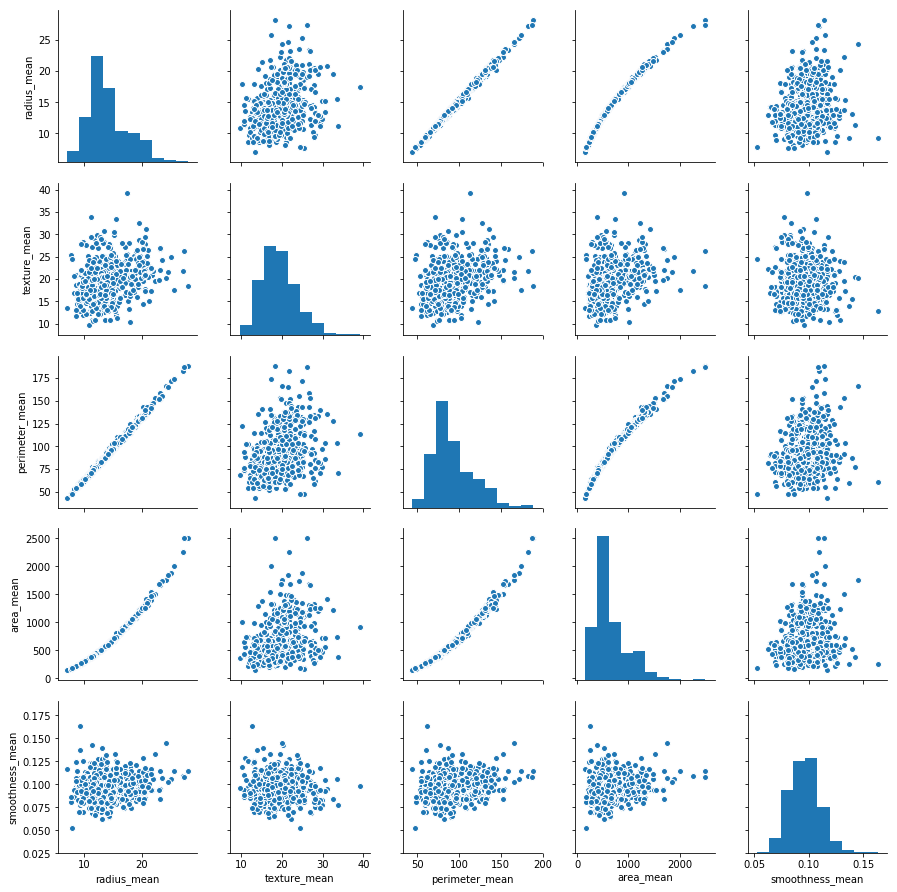

In [76]:
sns.pairplot(train, vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'] )

In [83]:
tempdf = pd.DataFrame({'diagnosis': train['diagnosis']})
tempdf.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [84]:
#Label encoder for diagnosis - maping one class to one value

labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
train['result'] = labelencoder.fit_transform(train['diagnosis'])
tempdf['result'] = train['result']


In [90]:
# To know classes present in diagnosis

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['diagnosis'])
print(le.classes_)

['B' 'M']


In [92]:
mc = 0
bc = 0
for i in range(len(train['result'])):
    if(train['diagnosis'][i] == 'M' and train['result'][i] == 0):
        print("Malignant = 0")
        print("Benign = 1")
        break
    else:
        print("Malignant = 1")
        print("Benign = 0")
        break

TypeError: 'Series' object is not callable

0 - Benign
1 - Maligant

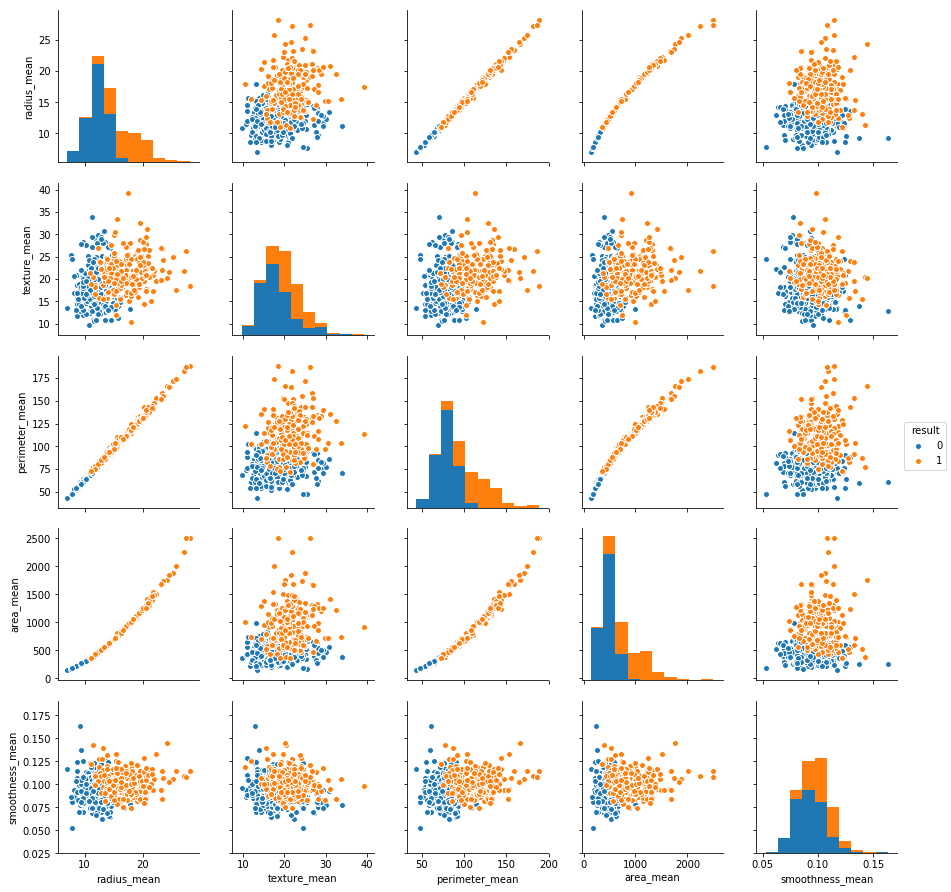

In [93]:
# hue is target col name

sns.pairplot(train, hue = 'result', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'] )

In [52]:
train['result'].value_counts()

0    357
1    212
Name: result, dtype: int64

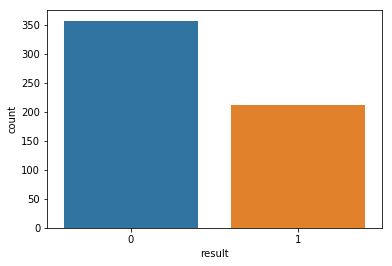

In [13]:
sns.countplot(train['result'], label = "Count") 

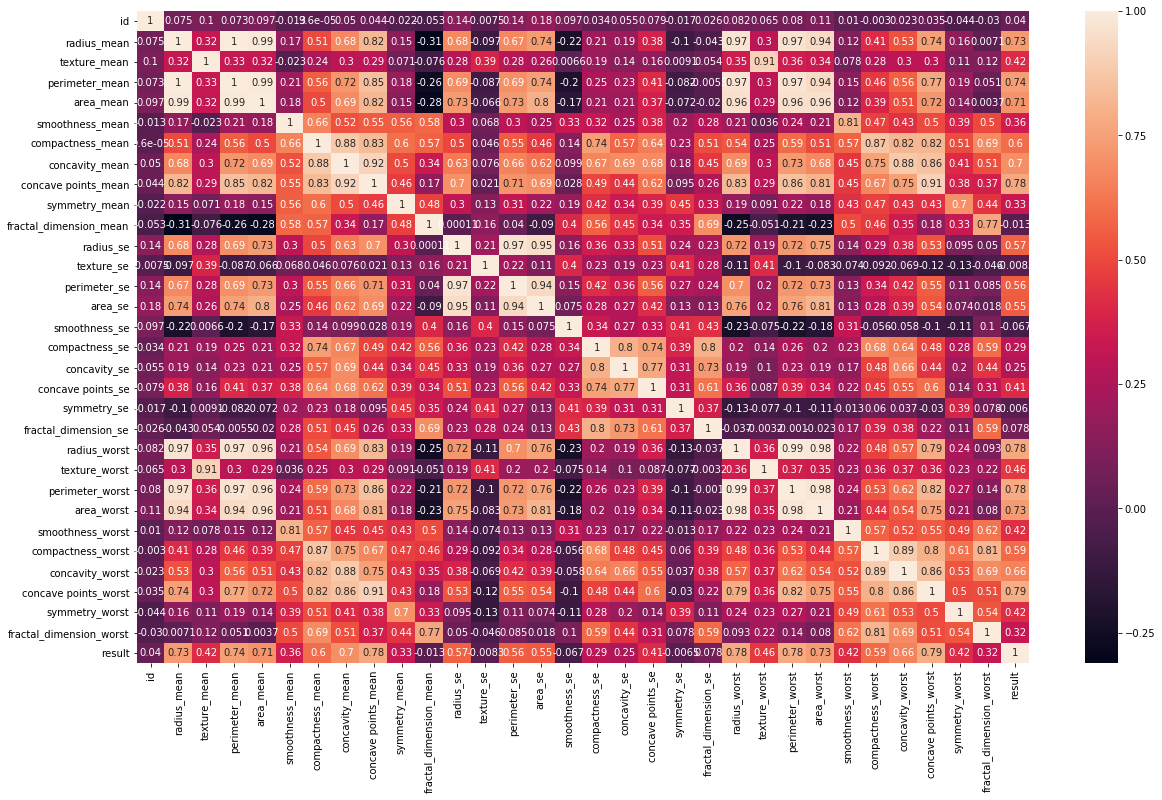

In [14]:
plt.figure(figsize=(20,12)) 
sns.heatmap(train.corr(), annot=True) 

In [94]:
train = train.drop(['id', 'diagnosis'],axis = 1)
train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [95]:
# Seperating x and y

x = train.iloc[:, :-1]
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
y = train.iloc[:, -1]
# y.head()
y.shape

(569,)

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 20)

In [33]:
print ('The size of our training "X" (input features) is', x_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', x_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)


The size of our testing "X" (input features) is (114, 30)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


In [98]:
# Importing SVM

from sklearn.svm import SVC

svc_model = SVC()

In [99]:
svc_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
y_pred = svc_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.5789473684210527

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
# confusion = pd.DataFrame(cm, index=['is_healthy', 'is_cancer'],
#                          columns=['predicted_healthy','predicted_cancer'])
# confusion
cm

array([[ 0, 48],
       [ 0, 66]], dtype=int64)

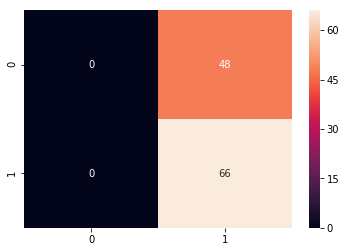

In [104]:
sns.heatmap(cm, annot=True)

In [105]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.58      1.00      0.73        66
          1       0.00      0.00      0.00        48

avg / total       0.34      0.58      0.42       114



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [106]:
# Min max scaling train data using sklearn

from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
scframe = scaler.fit_transform(x_train)

scframe = pd.DataFrame(scframe)

x_train = scframe.copy()

x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
1,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
2,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
3,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
4,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


In [107]:
# Min max scaling train data using manual method

range = x_train.max() - x_train.min()

x_train_scaled = (x_train - x_train.min())/range

x_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
1,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
2,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
3,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
4,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


In [108]:
# Normlizing testing data

scframe = scaler.fit_transform(x_test)

scframe = pd.DataFrame(scframe)

x_test = scframe.copy()

x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.143379,0.576674,0.145236,0.079089,0.391132,0.378409,0.250831,0.149869,0.261526,0.389277,...,0.112803,0.462482,0.111893,0.056220,0.393047,0.253766,0.344997,0.296245,0.181283,0.243578
1,0.422836,0.522138,0.394236,0.307892,0.062431,0.086702,0.124970,0.148824,0.165342,0.088578,...,0.370190,0.688990,0.340851,0.249482,0.193382,0.163066,0.307692,0.295143,0.197117,0.078906
2,0.595072,0.831533,0.596702,0.490072,0.371277,0.618223,0.688539,0.650288,0.670906,0.248358,...,0.587023,0.771038,0.600093,0.477238,0.517143,0.462145,0.834990,0.636583,0.351604,0.338670
3,0.216950,1.000000,0.204588,0.133068,0.128281,0.120148,0.120398,0.101673,0.219396,0.228650,...,0.170736,0.906732,0.161648,0.094091,0.292021,0.169047,0.246562,0.245126,0.149208,0.198980
4,0.341850,0.761339,0.336027,0.226094,0.241452,0.385226,0.331057,0.337794,0.712242,0.298368,...,0.326740,0.800491,0.335620,0.190220,0.571235,0.437975,0.509735,0.610403,0.611449,0.380718


In [109]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
y_pred = svc_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  0],
       [ 1, 47]], dtype=int64)

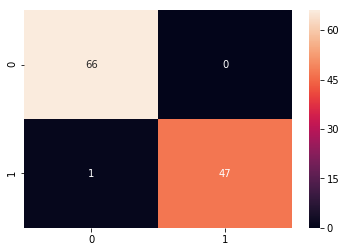

In [111]:
sns.heatmap(cm,annot=True,fmt="d")

In [113]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9912280701754386